### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





In [1]:
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualizaton
import pandas as pd #Load data in tabular format
import numpy as np #Working with arrays, functions, matrices


Problem Statement
This project aims to apply data visualization and statistical analysis to understand customer behavior patterns regarding coupon acceptance while driving. Specifically, we analyze both descriptive and inferential statistics to determine factors influencing coupon acceptance across different categories.

In [2]:
#LOADING THE DATA SET
data = pd.read_csv('data/coupons.csv') #This data is from the UCI Machine Learning Repository and was collected via a survey on Amazon Mechanical Turk

In [3]:
#Descriptive Statistics

In [4]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.head() #The head() method returns a specified number of rows, string from the top.

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.keys() #view the column header
#Analysis: the df has 26 columns (variables=atributes)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [7]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.describe() #Pandas describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.
#Analysis: The dataset consists of over 12684 data points in the Y column

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.value_counts() #Return the Mode: Use the value_counts() method in pandas to get the frequency count of each category in the nominal variable.

destination      passanger  weather  temperature  time  coupon                 expiration  gender  age  maritalStatus    has_children  education                               occupation                       income           car                                       Bar    CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y
Home             Alone      Rainy    55           10PM  Coffee House           1d          Female  26   Single           0             Bachelors degree                        Office & Administrative Support  $87500 - $99999  do not drive                              gt8    less1        1~3        1~3                   1~3               1                 0                  0                  1               0              0    1
No Urgent Place  Friend(s)  Sunny    80           6PM   Restaurant(<20)        2h          Male    26   Single           0             Gradua

In [9]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.info()
# From the 26 attributes (variables):
    #4 are Quantitative Interval or Ratio data types
    #22 are Qualitatieve> Nomial or Ordinal data types
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.duplicated()#Find duplicates in the df for each row True: Duplicate, False: Not duplicate:

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Length: 12684, dtype: bool

In [11]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.duplicated().sum()
#Analysis: 74 duplicate rows in the df

74

In [12]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Analyze the duplicates: Before dropping them, filter and examine these duplicated rows to understand why they are duplicated
duplicates = data[data.duplicated()]
print(duplicates)
#Analysis: Decision to remove the duplicates.

     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalS

In [13]:
#EXPLORATORY DATA ANALYSIS (EDA)
data = data.drop_duplicates() # Remove duplicate rows

data = data.reset_index(drop=True) # Optional: Reset the index after dropping duplicates (if necessary)

print(data.shape)# Check the shape of the data to ensure duplicates are removed
#Analysis: From 12684 to 12610 a total of 74 rows duplicated rows were removed. Attribute (variables) remain the same with 26.

(12610, 26)


In [14]:
#EXPLORATORY DATA ANALYSIS (EDA)
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values[missing_values > 0])
#Analysis: 
#Option 1: use dropna() to drop rows that contain missing values. However, the data set can be reduced. 
#Option 2: imputation of missinf values, fill the missing values with some appropriate values as the mean/median/mode.
    #For numerical data, fill missing values with the column's mean or median, while for categorical data, fill with the mode (most frequent value).
#Option 3: Keep Missing Values as a Separate Category (for Categorical Columns) e.g., data['car'].fillna('Unknown', inplace=True)


Missing values:
 car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
dtype: int64


In [15]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Option 3 Keep Missing Values as a Separate Category (for Categorical Columns) e.g., data['car'].fillna('Unknown', inplace=True)
data['car'].fillna('Unknown', inplace=True)

In [16]:
#Inferential Statistics

In [17]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Check for outliers in numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")
    #Analysis: 
         #Outliers in toCoupon_GEQ25min: 1463 >  for longer travel times (25 minutes or more), there are some extreme values that deviate from the majority of the data. 
         #This could imply that some individuals in the dataset are required to travel much longer than usual to use the coupon, which might be unusual behavior.
    
         #Outliers in direction_same and direction_opp: 2718 > the direction someone is traveling relative to the coupon location (same or opposite direction) has a significant number of unusual values. 
         #This could mean that there are many cases where people are either very far from the coupon or traveling in a direction that is considered abnormal for the data.
    


Outliers in temperature: 0

Outliers in has_children: 0

Outliers in toCoupon_GEQ5min: 0

Outliers in toCoupon_GEQ15min: 0

Outliers in toCoupon_GEQ25min: 1463

Outliers in direction_same: 2718

Outliers in direction_opp: 2718

Outliers in Y: 0


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


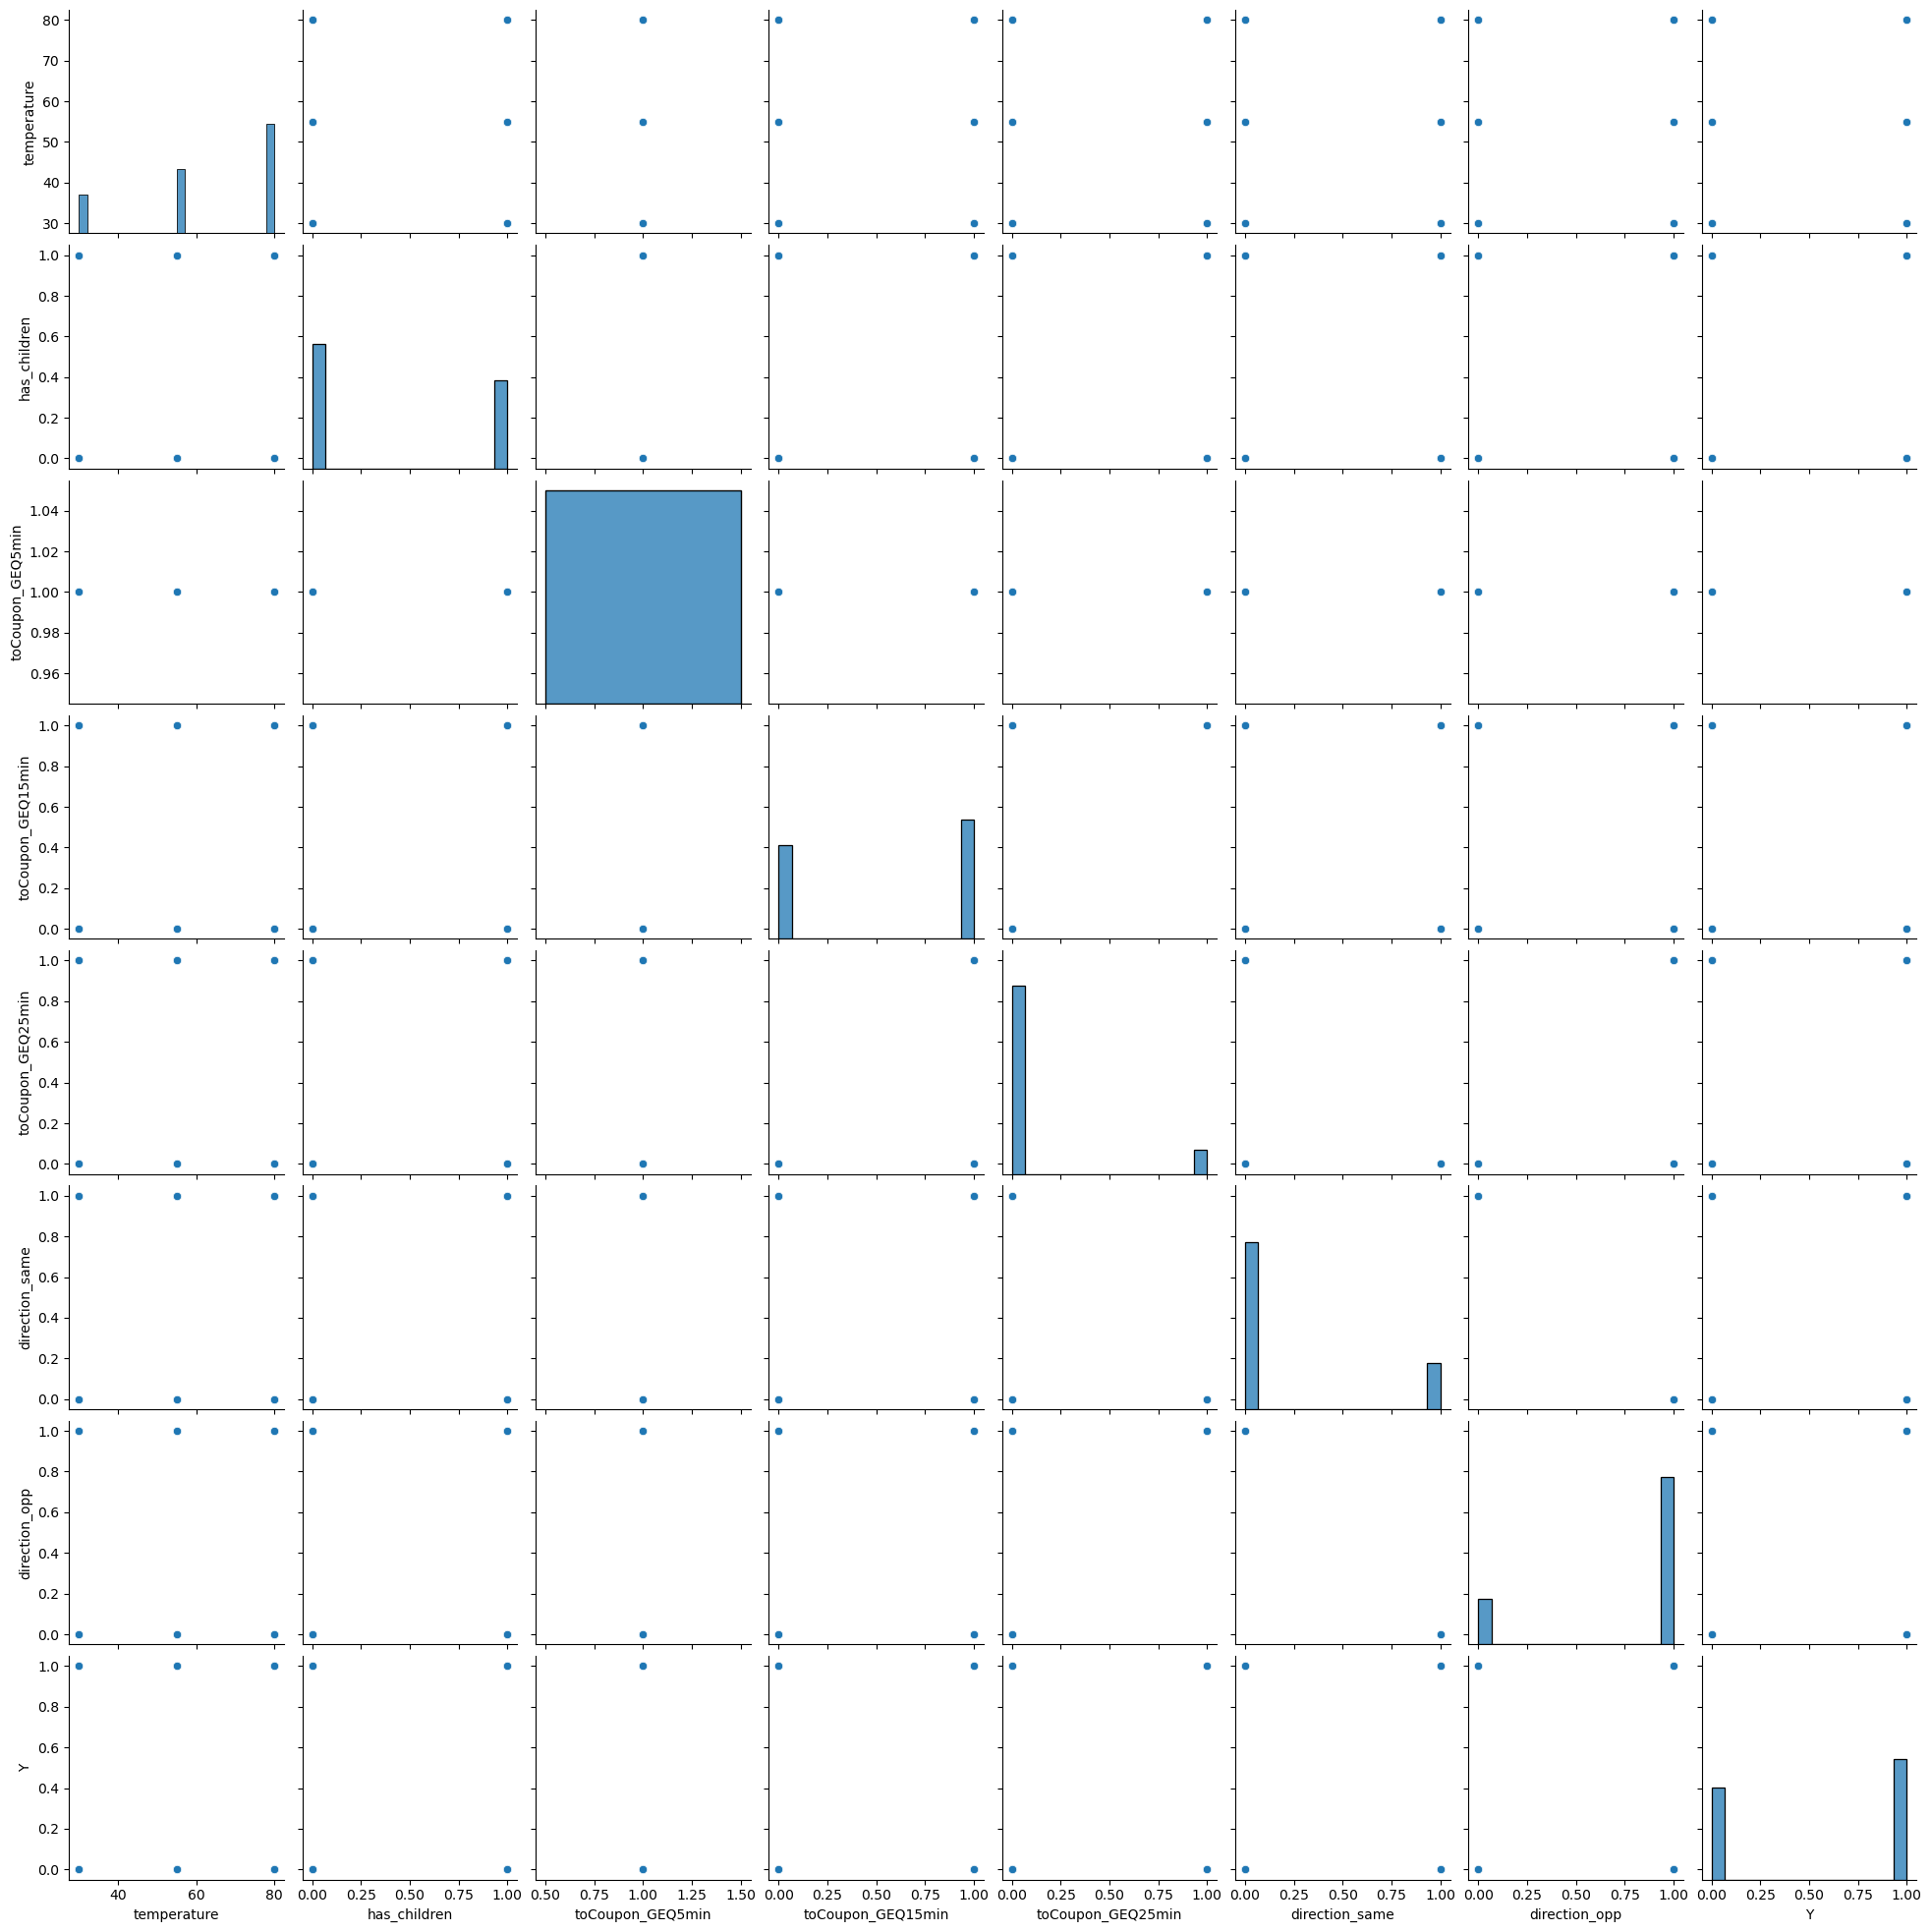

In [18]:
#VISUALIZATION
sns.pairplot(data)
plt.show()

In [19]:
#Analysis:

#Temperature: Skewed to the left Mean < Median = negative skewed
#Has Children: Skewed to the rigth Mean > Median = positive skewed
#To coupon GEQ 15 m: Mean = Median Uniform Distribution (equal spread, no picks)
#To coupon GEQ 25 m: Skewed to the rigth Mean > Median = positive skewed
#Direction Same: Skewed to the rigth Mean > Median = positive skewed
#Opposite Direction: Skewed to the left Mean < Median = negative skewed
#Y: Skewed to the left Mean < Median = negative skewed



c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


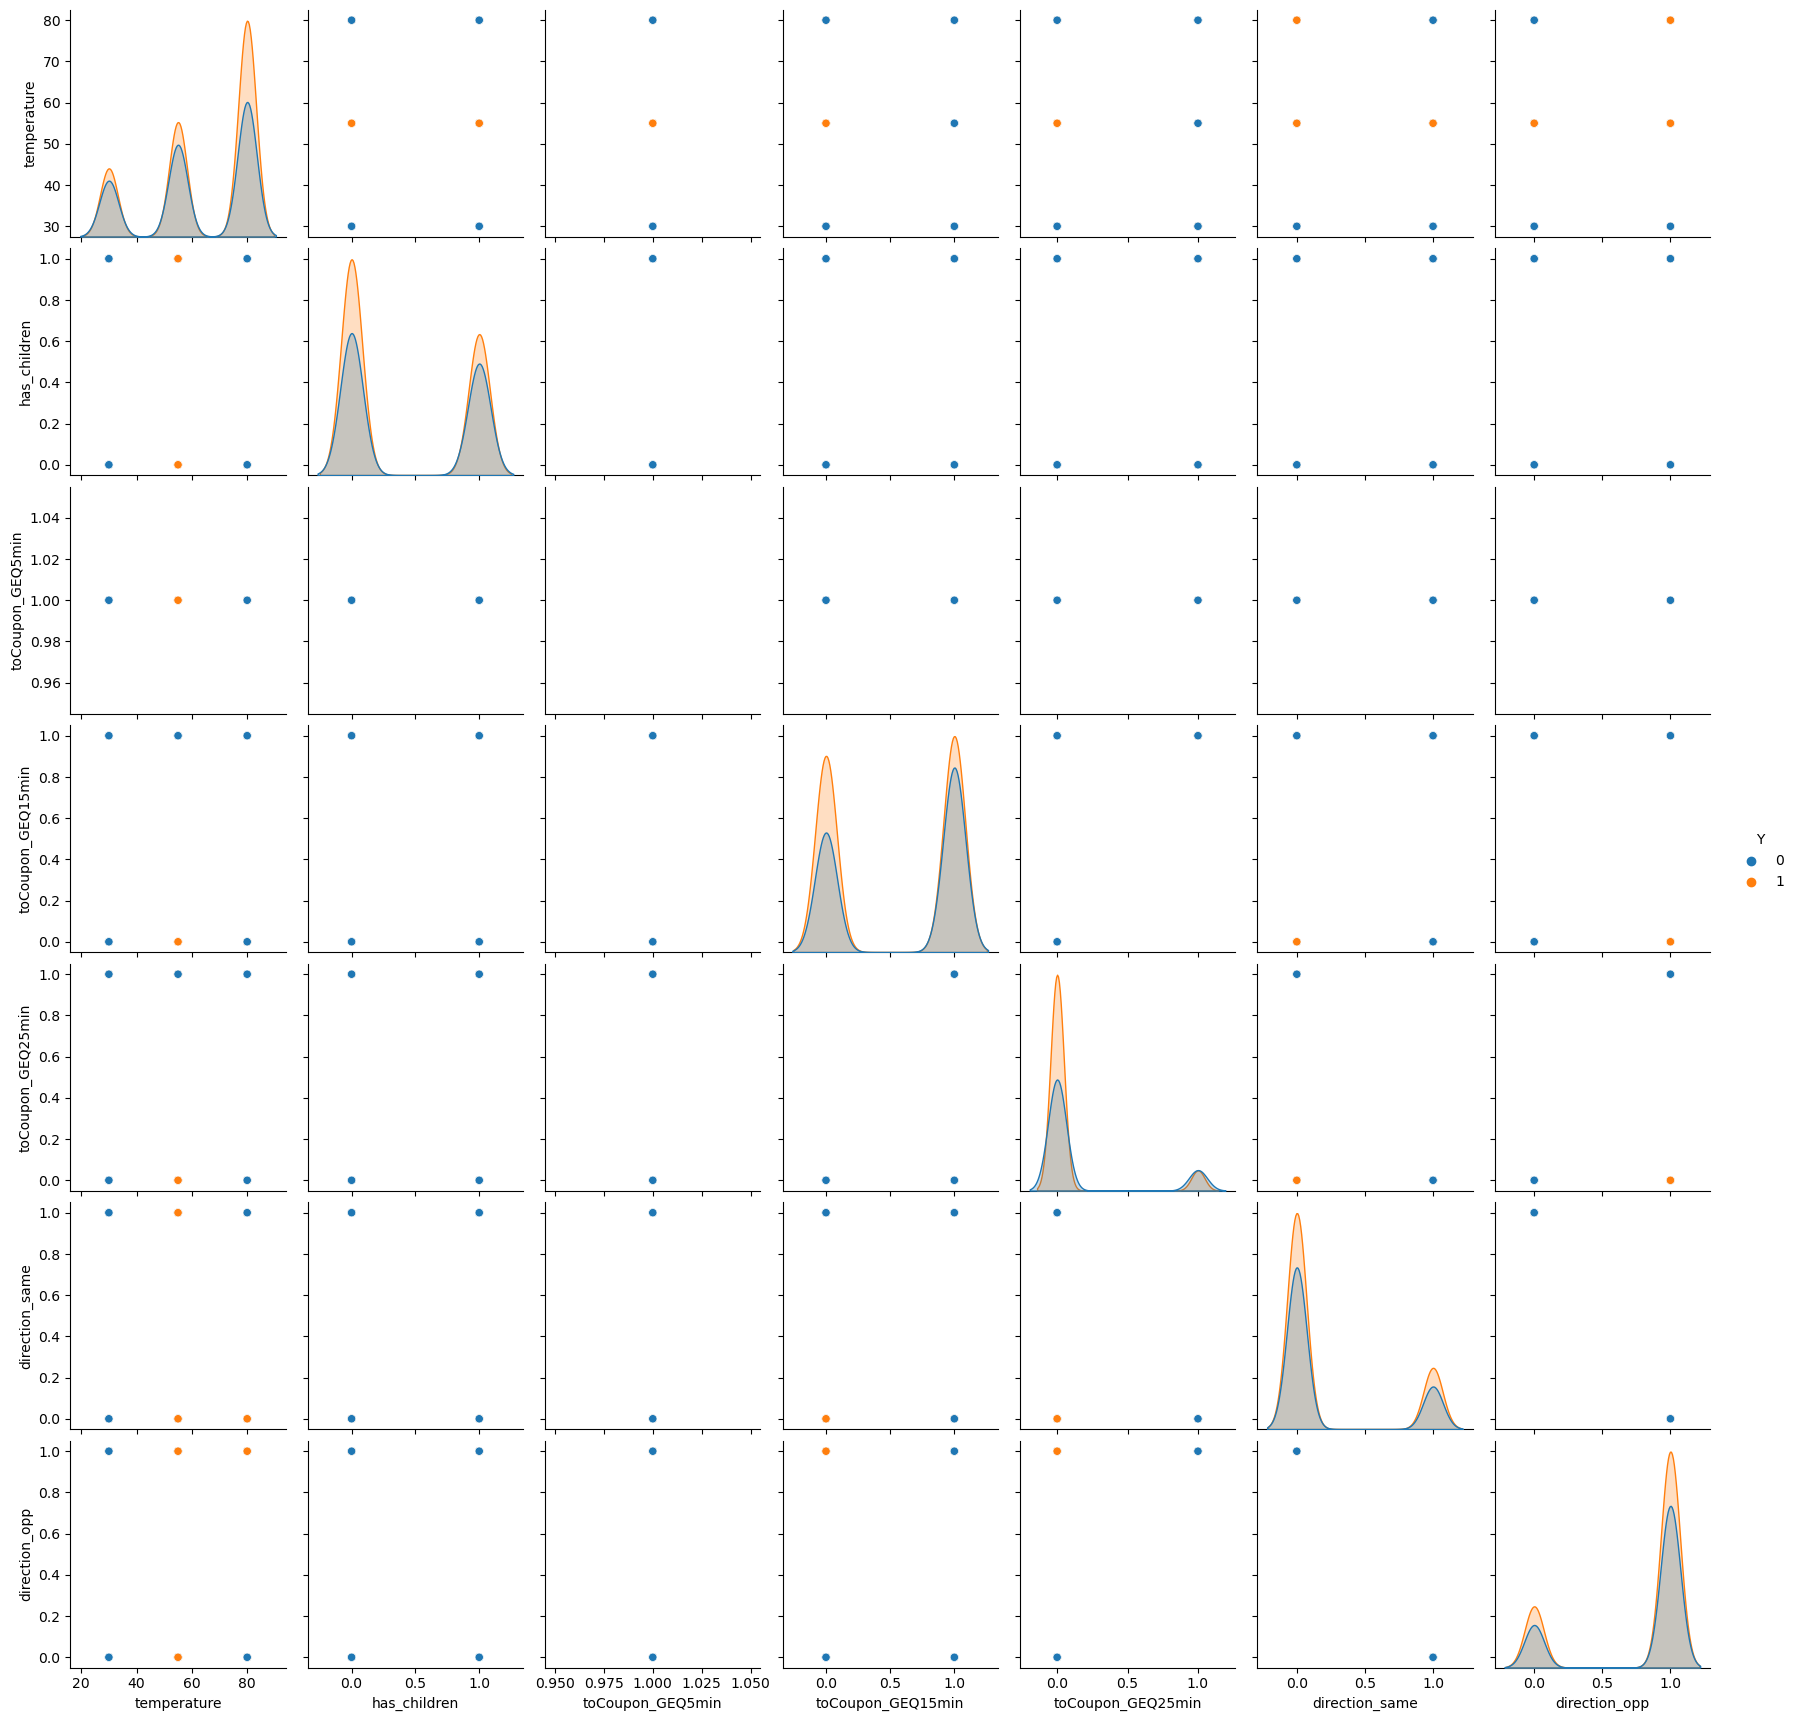

In [20]:
#VISUALIZATION
# Pair plot with a hue for categorical variable (e.g., 'Y')
sns.pairplot(data, hue='Y')

plt.show()

In [21]:
#Analysis:

#Temperature: Skewed to the left Mean < Median = negative skewed
#Has Children: Skewed to the rigth Mean > Median = positive skewed
#To coupon GEQ 15 m: Mean = Median Uniform Distribution (equal spread, no picks)
#To coupon GEQ 25 m: Skewed to the rigth Mean > Median = positive skewed
#Direction Same: Skewed to the rigth Mean > Median = positive skewed
#Opposite Direction: Skewed to the left Mean < Median = negative skewed
#Y: Skewed to the left Mean < Median = negative skewed

4. What proportion of the total observations chose to accept the coupon?



In [22]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Calculate the total count of observations that accepted the coupon (Y == 1) and did not accept (Y == 0)
coupon_acceptance_counts = data['Y'].value_counts()
coupon_acceptance_proportion = data['Y'].value_counts(normalize=True)

# Print the total counts
print(f"Total number of people who accepted the coupon: {coupon_acceptance_counts[1]}")
print(f"Total number of people who rejected the coupon: {coupon_acceptance_counts[0]}")

# Print the proportions
print(f"Proportion that accepted the coupon: {coupon_acceptance_proportion[1]:.2%}")
print(f"Proportion that did not accept the coupon: {coupon_acceptance_proportion[0]:.2%}")

Total number of people who accepted the coupon: 7157
Total number of people who rejected the coupon: 5453
Proportion that accepted the coupon: 56.76%
Proportion that did not accept the coupon: 43.24%


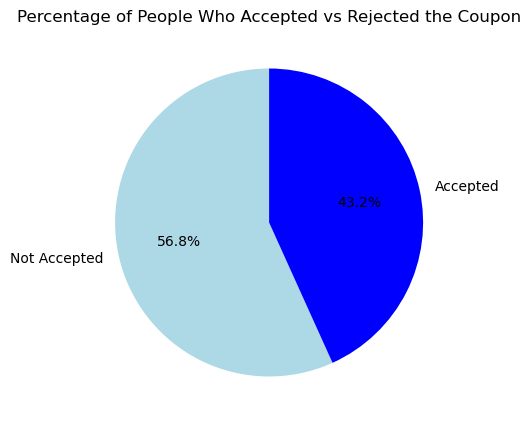

In [23]:
#VISUALIZATION
#Coupon Acceptance = Categorcial > Binary variable
# Calculate the total count of observations that accepted the coupon (Y == 1) and did not accept (Y == 0)

# Calculate the total count of observations that accepted the coupon (Y == 1) and did not accept (Y == 0)
coupon_acceptance_counts = data['Y'].value_counts()

# Create a pie chart to visualize the distribution of coupon acceptance
plt.figure(figsize=(5,5))
plt.pie(coupon_acceptance_counts.values, labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'blue'])

# Add a title
plt.title('Percentage of People Who Accepted vs Rejected the Coupon')

# Display the plot
plt.show()

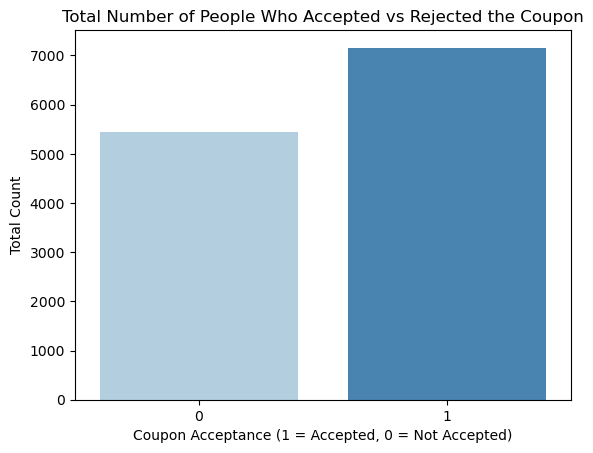

In [24]:
#VISUALIZATION (Using a diferetn type of graph) 
#Coupon Acceptance = Categorcial > Binary variable
# Calculate the total count of observations that accepted the coupon (Y == 1) and did not accept (Y == 0)
coupon_acceptance_counts = data['Y'].value_counts()

# Create a simple bar plot to visualize the total counts
sns.barplot(x=coupon_acceptance_counts.index, y=coupon_acceptance_counts.values, palette='Blues')

# Add labels and title
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Not Accepted)')
plt.ylabel('Total Count')
plt.title('Total Number of People Who Accepted vs Rejected the Coupon')

# Display the plot
plt.show()
#Analysis: The dataset wiht 12610 samples has a:
    #Total number of people who accepted the coupon: 7157
    #Total number of people who rejected the coupon: 5453
    #Proportion that accepted the coupon: 56.76%
    #Proportion that did not accept the coupon: 43.24%

5. Use a bar plot to visualize the `coupon` column.

In [25]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Coupon Acceptance = Categorical > Binary variable
# Count the occurrences of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Print the total count for each coupon category
for coupon, count in coupon_counts.items():
    print(f"Coupon Category: {coupon}, Total Count: {count}")


Coupon Category: Coffee House, Total Count: 3989
Coupon Category: Restaurant(<20), Total Count: 2779
Coupon Category: Carry out & Take away, Total Count: 2344
Coupon Category: Bar, Total Count: 2010
Coupon Category: Restaurant(20-50), Total Count: 1488


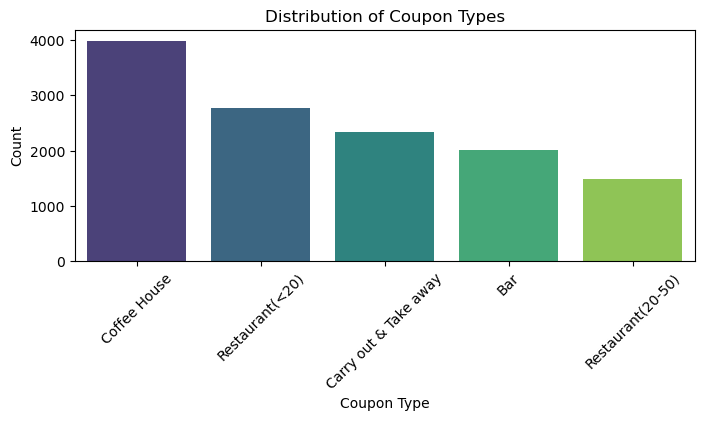

In [26]:
#VISUALIZATION
#Coupon Types = Categorical > Nominal variable
# Create a bar plot to visualize the distribution of coupon types
plt.figure(figsize=(8,3))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Distribution of Coupon Types')

# Rotate the x labels for better readability (if necessary)
plt.xticks(rotation=45)

# Display the plot
plt.show()
#Analysis: 
    #Coupon Category: Coffee House, Total Count: 3989
    #Coupon Category: Restaurant(<20), Total Count: 2779
    #Coupon Category: Carry out & Take away, Total Count: 2344
    #Coupon Category: Bar, Total Count: 2010
    #Coupon Category: Restaurant(20-50), Total Count: 1488

6. Use a histogram to visualize the temperature column.

In [27]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Temperature is a Quantitative > Continuous variable 
data['temperature'].value_counts()

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

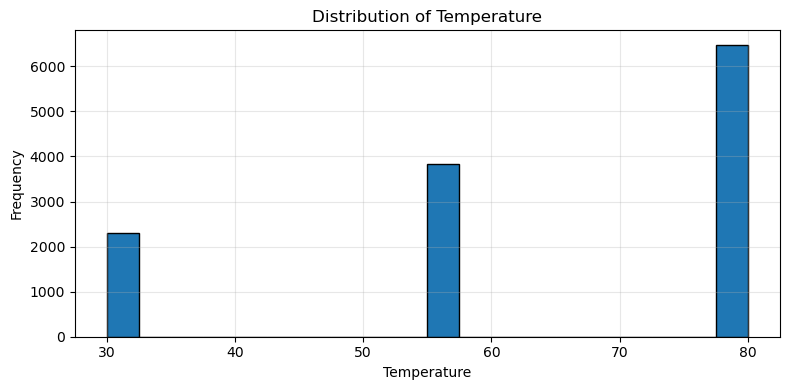

In [28]:
#VISUALIZATION
#Temperature is a Quantitative > Continuous variable 
# Create a histogram
plt.figure(figsize=(8, 4))
plt.hist(data['temperature'], bins=20, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#Analysis: The temperature has three values 30, 55 and 80 with the following totals:
    #80    6475
    #55    3830
    #30    2305

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
#NEW DATA SET
# Create a new DataFrame with only bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame to get familiar with the new data frame
print(bar_coupons_df.head())

# Display the shape of the new DataFrame
print(f"Number of bar coupon entries: {bar_coupons_df.shape[0]}")

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

In [30]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Bar is a Categorical > Ordinal variable (ranking)
bar_coupons_df['Bar'].value_counts()

Bar
never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [31]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Bar is a Categorical > Ordinal variable (ranking)
# Filter for bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Get the total value counts for accepted (Y=1) and rejected (Y=0) bar coupons
value_counts = bar_coupons_df['Y'].value_counts()

# Get the proportion of accepted (Y=1) and rejected (Y=0) bar coupons
proportions = bar_coupons_df['Y'].value_counts(normalize=True)

# Display the total value counts and proportions
print("Total value counts for bar coupons:")
print(value_counts)

print("\nProportion of accepted and rejected bar coupons:")
print(proportions)

#Analysis: 
#From 2010 participants with a Bar coupn a total of 1186 (0) Rejected the coupons equivalent to 59%
#From 2010 participants with a Bar coupon a total of  824 (1) Acepted the coupons equivalent to 41%


Total value counts for bar coupons:
Y
0    1186
1     824
Name: count, dtype: int64

Proportion of accepted and rejected bar coupons:
Y
0    0.59005
1    0.40995
Name: proportion, dtype: float64


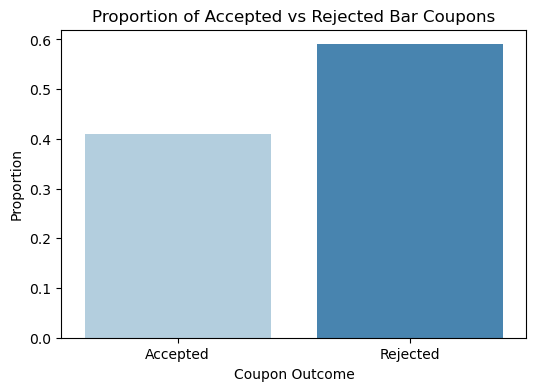

In [32]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Bar is a Categorical > Ordinal variable (ranking)
# Create a DataFrame with the proportions
# Calculate the proportion of accepted bar coupons
acceptance_rate = bar_coupons_df['Y'].mean()

# Calculate the proportion of rejected bar coupons
rejection_rate = 1 - acceptance_rate

# Create a DataFrame with the proportions
proportions = {
    'Coupon Outcome': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, rejection_rate]
}

proportions_df = pd.DataFrame(proportions)

# Create the bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='Coupon Outcome', y='Proportion', data=proportions_df, palette='Blues')

# Add labels and title
plt.ylabel('Proportion')
plt.title('Proportion of Accepted vs Rejected Bar Coupons')

# Display the plot
plt.show()
#Analysis: 
#From 2010 participants a total of 1186 (0) Rejected the coupons equivalent to 59%
#From 2010 participants a total of  824 (1) Acepted the coupons equivalent to 41%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [33]:
#EXPLORATORY DATA ANALYSIS (EDA)
    #Note: needed to convert the data types because several errors were triaggered in this analysis. e.g.,<= not supported bet str and int, because the Bar column has thow two data types.
    #sometimes the nan% or NaN% result was displayed making it confusing.

#CONVERTION for NON NUMERIC VALUES (categorical)
# Mapping the 'Bar' values to numeric equivalents
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({
    'never': 0,           # 'never' is represented as 0 visits
    'less1': 0.5,         # 'less1' is represented as less than 1 time (0.5)
    '1~3': 2,             # '1~3' is represented as the average value in this range
    '4~8': 6,             # '4~8' is represented as the average value in this range
    'gt8': 9              # 'gt8' is represented as more than 8 times (9 or more)
})

# Remove any rows where 'Bar' is NaN
bar_coupons_df = bar_coupons_df.dropna(subset=['Bar'])

# Create two groups: those who went to a bar 3 or fewer times and those who went more
bar_visits_3_or_fewer = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
bar_visits_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3]

# Calculate the acceptance rate for both groups
acceptance_rate_3_or_fewer = bar_visits_3_or_fewer['Y'].mean()
acceptance_rate_more_than_3 = bar_visits_more_than_3['Y'].mean()

# Print the results
print(f"Acceptance rate for those who went to a bar 3 or fewer times: {acceptance_rate_3_or_fewer:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times: {acceptance_rate_more_than_3:.2%}")

Acceptance rate for those who went to a bar 3 or fewer times: 37.04%
Acceptance rate for those who went to a bar more than 3 times: 76.88%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14360\2329305825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [34]:
#EXPLORATORY DATA ANALYSIS (EDA)
    #Note: needed to convert the data types because several errors were triaggered in this analysis. e.g.,<= not supported bet str and int, because the Bar column has thow two data types.
    #sometimes the nan% or NaN% result was displayed making it confusing.

# Ensure that the 'Bar' column is properly converted to numeric equivalents
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].map({
    'never': 0,           # 'never' is represented as 0 visits
    'less1': 0.5,         # 'less1' is represented as less than 1 time (0.5)
    '1~3': 2,             # '1~3' is represented as the average value in this range
    '4~8': 6,             # '4~8' is represented as the average value in this range
    'gt8': 9              # 'gt8' is represented as more than 8 times (9 or more)
})

# Remove any rows where 'Bar' or 'Y' or 'age' is NaN
bar_coupons_df = bar_coupons_df.dropna(subset=['Bar', 'Y', 'age'])

# Ensure the 'Bar' column is numeric by converting to float type as this is necessary to avoid the errors presented
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].astype(float)

# Check how many rows satisfy the condition
print(f"Total rows with Bar > 1 and age > 25: {len(bar_coupons_df[(bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25)])}")
print(f"Total rows for all others: {len(bar_coupons_df[~((bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25))])}")

# Filter for drivers who go to a bar more than once a month and are over the age of 25
drivers_more_than_once_and_over_25 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25)]

# Filter for all other drivers
all_others = bar_coupons_df[~((bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25))]

# Calculate the acceptance rate for drivers who go to a bar more than once a month and are over 25
if len(drivers_more_than_once_and_over_25) > 0:
    acceptance_rate_more_than_once_and_over_25 = drivers_more_than_once_and_over_25['Y'].mean()
else:
    acceptance_rate_more_than_once_and_over_25 = None

# Calculate the acceptance rate for all other drivers
if len(all_others) > 0:
    acceptance_rate_all_others = all_others['Y'].mean()
else:
    acceptance_rate_all_others = None

# Print the results
if acceptance_rate_more_than_once_and_over_25 is not None:
    print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_more_than_once_and_over_25:.2%}")
else:
    print("No drivers who go to a bar more than once a month and are over 25.")

if acceptance_rate_all_others is not None:
    print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others:.2%}")
else:
    print("No other drivers found.")

# Calculate the difference in acceptance rates if both rates exist
if acceptance_rate_more_than_once_and_over_25 is not None and acceptance_rate_all_others is not None:
    difference = acceptance_rate_more_than_once_and_over_25 - acceptance_rate_all_others
    print(f"Difference in acceptance rates: {difference:.2%}")
else:
    print("Not enough data to calculate the difference in acceptance rates.")

#Analysis: The response for both categories were zero. So No drivers who go to a bar more than once a month and are over 25.
           #No other drivers found.
           #No enough data to calculate the difference in acceptance rates.

Total rows with Bar > 1 and age > 25: 0
Total rows for all others: 0
No drivers who go to a bar more than once a month and are over 25.
No other drivers found.
Not enough data to calculate the difference in acceptance rates.


In [35]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Check for missing values in 'Bar' and 'age'
print(bar_coupons_df[['Bar', 'age']].isnull().sum())

# Check for non-numeric values in 'age' column
print(bar_coupons_df['age'].unique())

print(bar_coupons_df['age'].unique())

Bar    0.0
age    0.0
dtype: float64
[]
[]


In [36]:
print(bar_coupons_df[(bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25)].head())


Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 26 columns]


In [37]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Check for missing or invalid values in 'Y' column
print(bar_coupons_df['Y'].unique())


[]


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [38]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Ensure that the 'Bar' column is properly converted to numeric equivalents
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].map({
    'never': 0,           # 'never' is represented as 0 visits
    'less1': 0.5,         # 'less1' is represented as less than 1 time (0.5)
    '1~3': 2,             # '1~3' is represented as the average value in this range
    '4~8': 6,             # '4~8' is represented as the average value in this range
    'gt8': 9              # 'gt8' is represented as more than 8 times (9 or more)
})

# Remove any rows where 'Bar', 'Y', 'passanger', or 'occupation' is NaN
bar_coupons_df = bar_coupons_df.dropna(subset=['Bar', 'Y', 'passanger', 'occupation'])

# Ensure the 'Bar' column is numeric by converting to float type if necessary
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].astype(float)

# Filter for drivers who go to a bar more than once a month, had passengers that were not kids, and had occupations other than fishing or forestry
drivers_criteria = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                                  (bar_coupons_df['passanger'] != 'Kid') & 
                                  (~bar_coupons_df['occupation'].isin(['Fishing', 'Forestry']))]

# Filter for all other drivers
all_others = bar_coupons_df[~((bar_coupons_df['Bar'] > 1) & 
                              (bar_coupons_df['passanger'] != 'Kid') & 
                              (~bar_coupons_df['occupation'].isin(['Fishing', 'Forestry'])))]

# Check how many rows satisfy the condition
print(f"Total rows with Bar > 1, not kids as passangers, and occupations other than fishing or forestry: {len(drivers_criteria)}")
print(f"Total rows for all others: {len(all_others)}")

# Calculate the acceptance rate for drivers who meet the criteria
if len(drivers_criteria) > 0:
    acceptance_rate_criteria = drivers_criteria['Y'].mean()
else:
    acceptance_rate_criteria = None

# Calculate the acceptance rate for all other drivers
if len(all_others) > 0:
    acceptance_rate_all_others = all_others['Y'].mean()
else:
    acceptance_rate_all_others = None

# Print the results
if acceptance_rate_criteria is not None:
    print(f"Acceptance rate for drivers who meet the criteria: {acceptance_rate_criteria:.2%}")
else:
    print("No drivers found who meet the criteria.")

if acceptance_rate_all_others is not None:
    print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others:.2%}")
else:
    print("No other drivers found.")

# Calculate the difference in acceptance rates if both rates exist
if acceptance_rate_criteria is not None and acceptance_rate_all_others is not None:
    difference = acceptance_rate_criteria - acceptance_rate_all_others
    print(f"Difference in acceptance rates: {difference:.2%}")
else:
    print("Not enough data to calculate the difference in acceptance rates.")

#Analysis: The response for both categories were zero. So No drivers who go to a bar more than once a month and have no passangers and ocupation other thn fishing or forestry.
           #No other drivers found.
           #No enough data to calculate the difference in acceptance rates.

Total rows with Bar > 1, not kids as passangers, and occupations other than fishing or forestry: 0
Total rows for all others: 0
No drivers found who meet the criteria.
No other drivers found.
Not enough data to calculate the difference in acceptance rates.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [39]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Remove any rows where necessary columns have NaN values
bar_coupons_df = bar_coupons_df.dropna(subset=['Bar', 'Restaurant20To50', 'RestaurantLessThan20', 'Y', 'passanger', 'maritalStatus', 'age', 'income'])

# Ensure the 'Bar', 'Restaurant20To50', and 'RestaurantLessThan20' columns are numeric
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].astype(float)
bar_coupons_df['Restaurant20To50'] = bar_coupons_df['Restaurant20To50'].astype(float)
bar_coupons_df['RestaurantLessThan20'] = bar_coupons_df['RestaurantLessThan20'].astype(float)

# 1st group: Go to bars more than once a month, had passengers that were not kids, and were not widowed
group_1 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                         (bar_coupons_df['passanger'] != 'Kid') & 
                         (bar_coupons_df['maritalStatus'] != 'Widowed')]

# 2nd group: Go to bars more than once a month and are under the age of 30
group_2 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                         (bar_coupons_df['age'] < 30)]

# 3rd group: Go to restaurants costing less than $20 more than 4 times a month and income is less than 50K
group_3 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'] > 4) & 
                         (bar_coupons_df['income'] < 50000)]

# 4th group: Go to restaurants costing between $20 and $50 more than 4 times a month and income is less than 50K
group_4 = bar_coupons_df[(bar_coupons_df['Restaurant20To50'] > 4) & 
                         (bar_coupons_df['income'] < 50000)]

# Calculate the acceptance rate for each group
if len(group_1) > 0:
    acceptance_rate_group_1 = group_1['Y'].mean()
else:
    acceptance_rate_group_1 = None

if len(group_2) > 0:
    acceptance_rate_group_2 = group_2['Y'].mean()
else:
    acceptance_rate_group_2 = None

if len(group_3) > 0:
    acceptance_rate_group_3 = group_3['Y'].mean()
else:
    acceptance_rate_group_3 = None

if len(group_4) > 0:
    acceptance_rate_group_4 = group_4['Y'].mean()
else:
    acceptance_rate_group_4 = None

# Print the results
if acceptance_rate_group_1 is not None:
    print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: {acceptance_rate_group_1:.2%}")
else:
    print("No drivers found in group 1.")

if acceptance_rate_group_2 is not None:
    print(f"Acceptance rate for drivers who go to bars more than once a month and are under 30: {acceptance_rate_group_2:.2%}")
else:
    print("No drivers found in group 2.")

if acceptance_rate_group_3 is not None:
    print(f"Acceptance rate for drivers who go to restaurants costing less than $20 more than 4 times a month and have an income less than 50K: {acceptance_rate_group_3:.2%}")
else:
    print("No drivers found in group 3.")

if acceptance_rate_group_4 is not None:
    print(f"Acceptance rate for drivers who go to restaurants costing between $20 and $50 more than 4 times a month and have an income less than 50K: {acceptance_rate_group_4:.2%}")
else:
    print("No drivers found in group 4.")

# Calculate the differences between groups if applicable
if acceptance_rate_group_1 is not None and acceptance_rate_group_2 is not None:
    difference_1_2 = acceptance_rate_group_1 - acceptance_rate_group_2
    print(f"Difference in acceptance rates between group 1 and group 2: {difference_1_2:.2%}")

if acceptance_rate_group_1 is not None and acceptance_rate_group_3 is not None:
    difference_1_3 = acceptance_rate_group_1 - acceptance_rate_group_3
    print(f"Difference in acceptance rates between group 1 and group 3: {difference_1_3:.2%}")

if acceptance_rate_group_1 is not None and acceptance_rate_group_4 is not None:
    difference_1_4 = acceptance_rate_group_1 - acceptance_rate_group_4
    print(f"Difference in acceptance rates between group 1 and group 4: {difference_1_4:.2%}")

if acceptance_rate_group_3 is not None and acceptance_rate_group_4 is not None:
    difference_3_4 = acceptance_rate_group_3 - acceptance_rate_group_4
    print(f"Difference in acceptance rates between group 3 and group 4: {difference_3_4:.2%}")

#Analysis: The four groups have 0 participants to get a result. More data needst o be collected as a a recommendation

No drivers found in group 1.
No drivers found in group 2.
No drivers found in group 3.
No drivers found in group 4.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [40]:
#Analysis: No drivers were found in the grops suggested. A recommendation is to increase the acceptance criteria of coupons with other demographics. 
#Also, it is possible that the data has errors during the collection or entry time creating constant errors and data issues.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [41]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Load the dataset (assuming it's saved locally as 'coupons.csv')
data = pd.read_csv('data/coupons.csv')

# Explore unique values in the 'coupon' column to see the types of coupons available
print("Unique coupon types:", data['coupon'].unique())

#Note: Remove Bar as this was analyzed before


Unique coupon types: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [42]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Filter the data for passengers who accepted the coupons (Y == 1)
accepted_coupons = data[data['Y'] == 1]

# Create separate datasets for each coupon group to see which one can be explore, but removing the Bar
#bar_coupons = accepted_coupons[accepted_coupons['coupon'] == 'Bar']
coffee_house_coupons = accepted_coupons[accepted_coupons['coupon'] == 'Coffee House']
carryout_coupons = accepted_coupons[accepted_coupons['coupon'] == 'Carry out & Take away']
restaurant_20_50_coupons = accepted_coupons[accepted_coupons['coupon'] == 'Restaurant(20-50)']
restaurant_less_20_coupons = accepted_coupons[accepted_coupons['coupon'] == 'Restaurant(<20)']

# Combine the coupon datasets into a new dataset for analysis removing the Bar
combined_accepted_coupons = pd.concat([coffee_house_coupons, carryout_coupons, 
                                       restaurant_20_50_coupons, restaurant_less_20_coupons])

# Save the combined dataset for further exploration if needed
# combined_accepted_coupons.to_csv('combined_accepted_coupons.csv', index=False)



In [43]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Find the total value counts of accepted coupons by coupon type
coupon_value_counts = combined_accepted_coupons['coupon'].value_counts()

# Calculate the proportion of each coupon type
coupon_proportions = combined_accepted_coupons['coupon'].value_counts(normalize=True)

# Print the total value counts
print("Total value counts for accepted coupons by coupon type:\n", coupon_value_counts)

# Print the proportion of accepted coupons by coupon type
print("\nProportion of accepted coupons by coupon type:\n", coupon_proportions)
#Analysis: 
#Coffee House and Restaurant(<20) coupons were almost equally accepted, with 30% to 31% of the accepted coupons.
#Carry out & Take away coupons were also popular but with 27.57% of aceptance.
#Restaurant(20-50) coupons had had a lower acceptance rate, with 10.31% of the total accepted coupons.

Total value counts for accepted coupons by coupon type:
 coupon
Coffee House             1995
Restaurant(<20)          1970
Carry out & Take away    1760
Restaurant(20-50)         658
Name: count, dtype: int64

Proportion of accepted coupons by coupon type:
 coupon
Coffee House             0.312549
Restaurant(<20)          0.308632
Carry out & Take away    0.275732
Restaurant(20-50)        0.103086
Name: proportion, dtype: float64


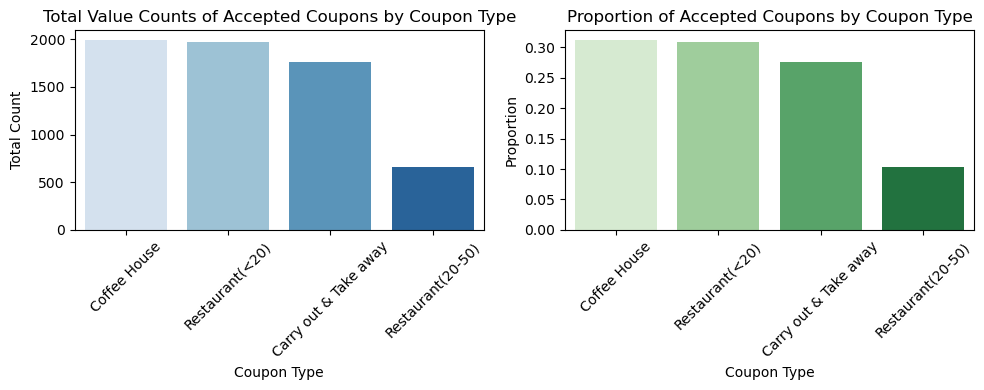

In [44]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Set the figure size for both plots
plt.figure(figsize=(10, 4))

# 1. Total Value Counts Bar Plot
plt.subplot(1, 2, 1)  # First subplot
sns.barplot(x=coupon_value_counts.index, y=coupon_value_counts.values, palette='Blues')
plt.title('Total Value Counts of Accepted Coupons by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# 2. Proportion Bar Plot
plt.subplot(1, 2, 2)  # Second subplot
sns.barplot(x=coupon_proportions.index, y=coupon_proportions.values, palette='Greens')
plt.title('Proportion of Accepted Coupons by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()
#Analysis: 
#Coffee House and Restaurant(<20) coupons were almost equally accepted, with 30% to 31% of the accepted coupons.
#Carry out & Take away coupons were also popular but with 27.57% of aceptance.
#Restaurant(20-50) coupons had had a lower acceptance rate, with 10.31% of the total accepted coupons.

In [45]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Analyze passenger characteristics for accepted coupons

# Display the distribution of ages among passengers who accepted coupons
age_distribution = combined_accepted_coupons['age'].value_counts()
print("\nAge distribution of passengers who accepted coupons:\n", age_distribution)

#Analysis: A total of 6416 participants are distributes into diferent types of coupon aceptance. The age that accepted the most coupons are 21 and 26 years old


Age distribution of passengers who accepted coupons:
 age
21         1376
26         1332
31          989
50plus      826
36          643
41          549
46          357
below21     311
Name: count, dtype: int64


In [46]:
# Set plot size for all graphs
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

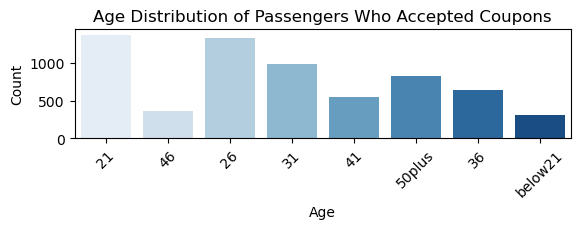

In [47]:
# 1. Age Distribution Plot
plt.subplot(3, 1, 1)  # Create a subplot for age
sns.countplot(data=combined_accepted_coupons, x='age', palette='Blues')
plt.title("Age Distribution of Passengers Who Accepted Coupons")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#Analysis: A total of 6416 participants are distributes into diferent types of coupon aceptance. The age that accepted the most coupons are 21 and 26 years old

In [48]:
# Display the distribution of occupations
occupation_distribution = combined_accepted_coupons['occupation'].value_counts()
print("\nOccupation distribution of passengers who accepted coupons:\n", occupation_distribution)
#Analysis: The main group that accepted coupons are Unemployed with 934. Followed by the Student group with 847. Will be interesting to know why the Computer and Mathematical professionals are accepting couponsas part of the third group.


Occupation distribution of passengers who accepted coupons:
 occupation
Unemployed                                   934
Student                                      847
Computer & Mathematical                      711
Sales & Related                              535
Education&Training&Library                   454
Management                                   428
Office & Administrative Support              331
Arts Design Entertainment Sports & Media     293
Business & Financial                         269
Retired                                      209
Food Preparation & Serving Related           151
Healthcare Practitioners & Technical         147
Healthcare Support                           140
Transportation & Material Moving             121
Community & Social Services                  105
Protective Service                           100
Construction & Extraction                     93
Architecture & Engineering                    93
Legal                                        

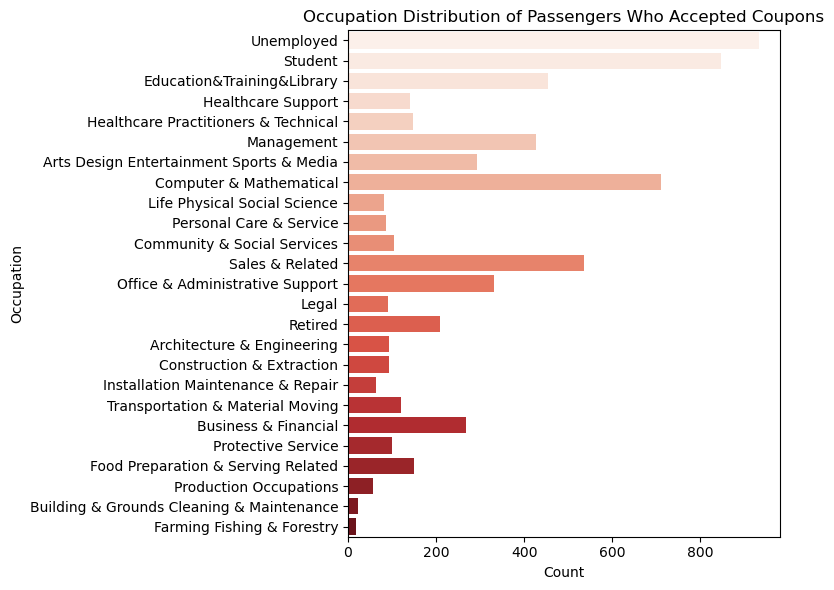

In [49]:
# 2. Occupation Distribution Plot
# Adjust the figure size to make more room for labels
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot for occupation distribution
sns.countplot(data=combined_accepted_coupons, y='occupation', palette='Reds')

# Add titles and labels
plt.title("Occupation Distribution of Passengers Who Accepted Coupons")
plt.xlabel("Count")
plt.ylabel("Occupation")

# Ensure that everything fits in the figure
plt.tight_layout()

# Display the plot
plt.show()
#Analysis: The main group that accepted coupons are Unemployed with 934. Followed by the Student group with 847. Will be interesting to know why the Computer and Mathematical professionals are accepting couponsas part of the third group.

In [50]:
# Display the distribution of income levels
income_distribution = combined_accepted_coupons['income'].value_counts()
print("\nIncome distribution of passengers who accepted coupons:\n", income_distribution)
#Analysis: The income for the people that accepted coups is $25000 - $37499 with a total of 1051 participants


Income distribution of passengers who accepted coupons:
 income
$25000 - $37499     1051
$12500 - $24999      932
$37500 - $49999      925
$50000 - $62499      880
$100000 or More      866
Less than $12500     542
$87500 - $99999      430
$62500 - $74999      400
$75000 - $87499      357
Name: count, dtype: int64


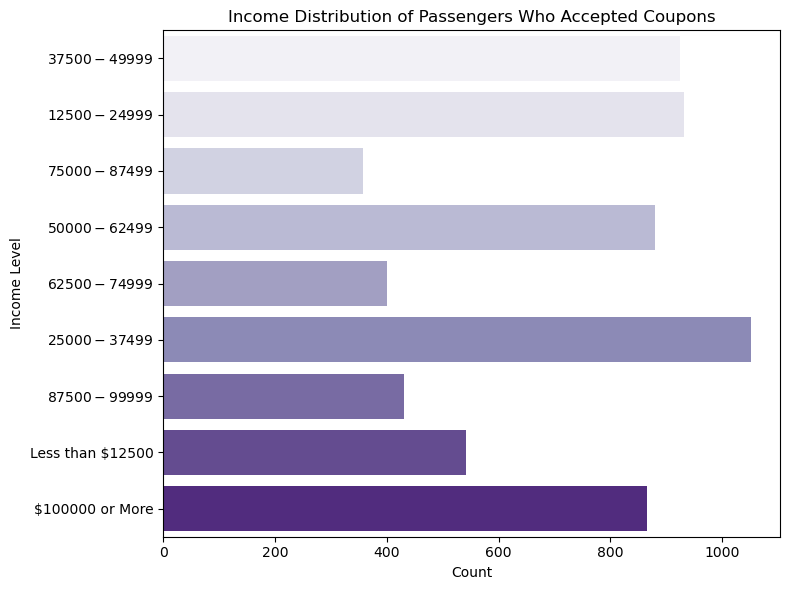

In [51]:
# 3. Income Distribution Plot
# Adjust the figure size to make more room for labels
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot for income distribution
sns.countplot(data=combined_accepted_coupons, y='income', palette='Purples')

# Add titles and labels
plt.title("Income Distribution of Passengers Who Accepted Coupons")
plt.xlabel("Count")
plt.ylabel("Income Level")

# Display the plot
plt.tight_layout()  # Ensure everything fits within the figure area
plt.show()
#Analysis: The income for the people that accepted coups is $25000 - $37499 with a total of 1051 participants

In [52]:
# Group by the specified variables and calculate the acceptance rate for each group
grouped_data = accepted_coupons.groupby(['destination', 'passanger', 'weather', 'time', 'maritalStatus']).size().reset_index(name='count')

# Sort the grouped data by count to see which groups accepted the most coupons
sorted_grouped_data = grouped_data.sort_values(by='count', ascending=False)

# Display the results
print("Grouped data by destination, passanger, weather, time, and marital status:\n")
print(sorted_grouped_data.head(20))  # Display top 20 groups


Grouped data by destination, passanger, weather, time, and marital status:

         destination  passanger weather  time      maritalStatus  count
188             Work      Alone   Sunny   7AM             Single    507
187             Work      Alone   Sunny   7AM    Married partner    437
24              Home      Alone   Sunny   6PM             Single    408
115  No Urgent Place  Friend(s)   Sunny   2PM             Single    390
23              Home      Alone   Sunny   6PM    Married partner    351
105  No Urgent Place  Friend(s)   Sunny  10AM             Single    248
114  No Urgent Place  Friend(s)   Sunny   2PM    Married partner    212
120  No Urgent Place  Friend(s)   Sunny   6PM             Single    198
189             Work      Alone   Sunny   7AM  Unmarried partner    189
66   No Urgent Place      Alone   Sunny  10AM             Single    174
25              Home      Alone   Sunny   6PM  Unmarried partner    162
119  No Urgent Place  Friend(s)   Sunny   6PM    Married par

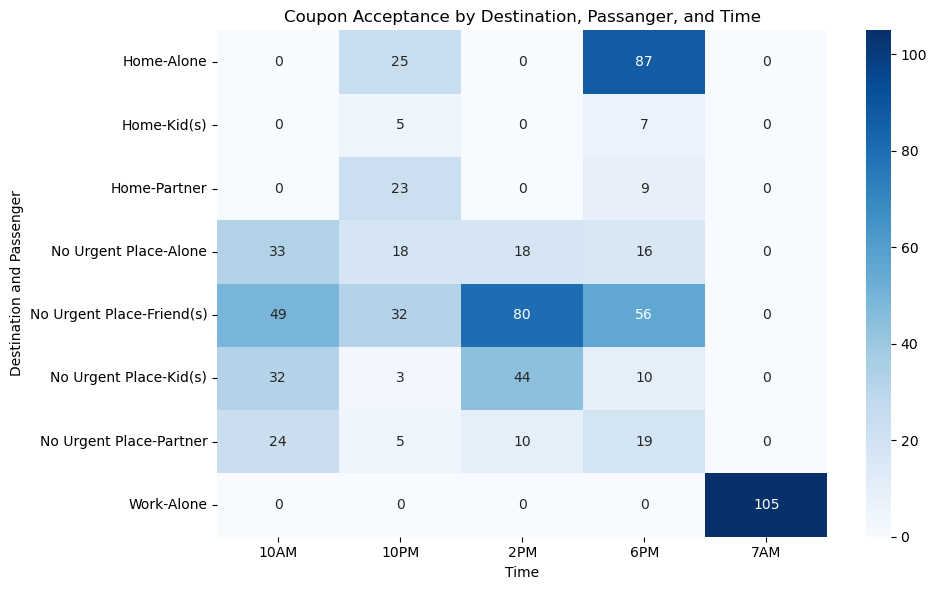

In [53]:
# Group by the specified variables and calculate the acceptance count for each group
grouped_data = accepted_coupons.groupby(['destination', 'passanger', 'weather', 'time', 'maritalStatus']).size().reset_index(name='count')

# Pivot the data to create a heatmap-compatible format (you may want to choose a subset of variables for visualization)
heatmap_data = grouped_data.pivot_table(index=['destination', 'passanger'], columns=['time'], values='count', fill_value=0)

# Convert the values in the heatmap to integers for better readability
heatmap_data = heatmap_data.astype(int)

# Set the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.title("Coupon Acceptance by Destination, Passanger, and Time")
plt.xlabel("Time")
plt.ylabel("Destination and Passenger")

# Display the heatmap
plt.tight_layout()
plt.show()
#Analysis: Based ont he heat map below, People that will acpet the coupon are in the Home Alone caegroy duing the time of 6PM. Followed by Work-Alon at 7am. Alsol people that are meeting with friends are likely to acpet the coupon during 2pm.
#meaning that dinner time and breakfast time for alone people have a higer probabilithy to acpet the coupon. 
